# Image Classification - CIFAR 10 

In [ ]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
# For inline plotting, commands in cells below the cell that outputs a plot will not affect the plot.

## Load dataset from Keras

In [ ]:
#https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 71s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
print('x_train range: ',np.amin(x_train),' to ',np.amax(x_train))

x_train range:  0  to  255


In [ ]:
y_train[:5,:]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_unique = np.unique(y_train.reshape(50000))

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
class_names_dict = {'id':y_train_unique,'class':class_names}
class_names_dict

{'class': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'id': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)}

Label:  [7]


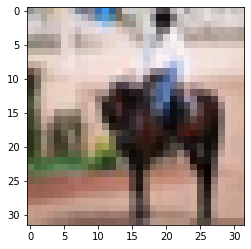

In [ ]:
n = 11
plt.imshow(x_train[n])
print('Label: ',y_train[n])

## Train Model

### Dense layer model - Preprocessing

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255

In [ ]:
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [ ]:
x_test[:2,:10]

array([[0.61960787, 0.4392157 , 0.19215687, 0.62352943, 0.43529412,
        0.18431373, 0.64705884, 0.45490196, 0.2       , 0.6509804 ],
       [0.92156863, 0.92156863, 0.92156863, 0.90588236, 0.90588236,
        0.90588236, 0.9098039 , 0.9098039 , 0.9098039 , 0.9098039 ]],
      dtype=float32)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Dense layer model - Training & Evaluation

In [ ]:
network.fit(x_train, y_train, epochs=5, batch_size=128) # Note: accuracy here refers to training set

Epoch 1/5
391/391 [==============================] - 8s 20ms/step - loss: 3.6275 - accuracy: 0.1940
Epoch 2/5
391/391 [==============================] - 8s 20ms/step - loss: 1.8643 - accuracy: 0.3331
Epoch 3/5
391/391 [==============================] - 8s 20ms/step - loss: 1.7552 - accuracy: 0.3746
Epoch 4/5
391/391 [==============================] - 8s 20ms/step - loss: 1.6839 - accuracy: 0.4031
Epoch 5/5
391/391 [==============================] - 8s 20ms/step - loss: 1.6294 - accuracy: 0.4234


In [ ]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.6180 - accuracy: 0.4282
test_acc: 0.42820000648498535


In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


### Convolutional neural network (convnet) - Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[1,:]

array([9], dtype=uint8)

In [ ]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 32, 32, 3))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_train[1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Convolutional neural network (Convnet) - Training & Evaluation

> Indented block



In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))) #The convolution has 32 filters of size (3,3)
model.add(layers.MaxPooling2D((2,2))) #look at all 2x2 windows in the input tensor, and simply reduce to the maximum value of the 4 inputs as the output

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #The 10 outputs represent the classification possibilities

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 50s 63ms/step - loss: 1.8512 - accuracy: 0.3225
Epoch 2/5
782/782 [==============================] - 50s 63ms/step - loss: 1.2978 - accuracy: 0.5373
Epoch 3/5
782/782 [==============================] - 50s 64ms/step - loss: 1.1039 - accuracy: 0.6112
Epoch 4/5
782/782 [==============================] - 50s 64ms/step - loss: 0.9806 - accuracy: 0.6582
Epoch 5/5
782/782 [==============================] - 50s 64ms/step - loss: 0.8841 - accuracy: 0.6900


In [ ]:
y_test.shape

(10000, 10)

In [ ]:
#test_loss, test_acc = network.evaluate(x_test.reshape(10000,32*32*3), y_test)
#print('test_acc:', test_acc)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 1.1339 - accuracy: 0.6179
test_acc: 0.617900013923645


In [ ]:
# Pending: visualize prediction examples and images, understand and explain all the code

### Convolutional neural network (Convnet) VGG Architecture - Preprossesing





In [ ]:
datagen = ImageDataGenerator()
it = datagen.flow(x_train, y_train)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
782/782 [==============================] - 276s 351ms/step - loss: 1.4175 - accuracy: 0.4943
Epoch 2/3
782/782 [==============================] - 273s 349ms/step - loss: 0.9160 - accuracy: 0.6796
Epoch 3/3
782/782 [==============================] - 273s 349ms/step - loss: 0.6970 - accuracy: 0.7585


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 13s 40ms/step - loss: 0.8152 - accuracy: 0.7159
test_acc: 0.7159000039100647
